## Machine Learning and Statistics:
# Overview of the Scipy-Stats Python Library
***
### Author: Julian Dunne | Email:[g00267940@gmit.ie]

***
# SCIPY.STATS Python Library

***
# Analysis of Variance

***
## Introduction to Anova: 

ANOVA is used to determine statistical differences between the means of two or more independent groups. A one-way ANOVA is the most basic type of Anova and compares the effects of an independent variable on multiple dependent variables within the groups. A Two-way ANOVA performs the same analysis except it uses more than one independent variable, while a factorial ANOVA increases further the number of independent variables.<br>

Where data variance is large (spread of data away from the mean) within the groups, the greater the possibility that the mean of a sample selected from the data will be different due to chance. For this reason ANOVA takes into account sample sizes whereby small samples increase the possiblity of data outliers and the differences between sample means. Anova returns an F value, which can then analysed to give a probability (p-value) of whether or not differences between the groups are statistically significant. Where the p-value is below 0.05 it can be said that there is a statistically significant difference and the groups are not all the same because of the the spread of the mean.<br>

It is important to realize that the one-way ANOVA is an omnibus test statistic and cannot tell you which specific groups were statistically significantly different from each other, it only tells you that at least two groups were different.[1]. Determining which groups differ from one another can be done using a post hoc test. The Tukey test is one such test that compares the differences between means of values rather than comparing pairs of values. This will be looked at a later on.

***
### Import the required libraries

In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Stats.
import scipy.stats as ss

# Tukey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

***
### Diet Dataset
The following dataset contains information on 76 people using one of three diets. The dataset was downloaded from The University of Sheffield webpage https://www.sheffield.ac.uk/mash/statistics/datasets. Two participants were removed from the study as their gender was not included in the original dataset. The original dataset can be downloaded from url https://www.sheffield.ac.uk/polopoly_fs/1.937195!/file/Diet_R.csv.

In [2]:
# Modified diet dataset
df_diet = pd.read_csv('diet_r.csv', sep=',')
df_diet.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,1,0,22,159,58,1,54.2
1,2,0,46,192,60,1,54.0
2,3,0,55,170,64,1,63.3
3,4,0,33,171,64,1,61.1
4,5,0,50,170,65,1,62.2


***
## One-Way Anova
This notebook will look to perform a one-way Anova test on the dataset. To perform the one-way Anova we will only look at the male diet type and weight after 6 weeks.<br>
<b>Null Hypothesis: </b> There is no difference in the mean amount of weight loss when comparing the three different diets.

In [3]:
df_anova_one_way = df_diet[df_diet['gender'] == 1]
df_anova_one_way.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
43,15,1,39,168,71,1,71.6
44,16,1,31,158,72,1,70.9
45,17,1,40,173,74,1,69.5
46,18,1,50,160,78,1,73.9
47,19,1,43,162,80,1,71.0


***
## Assumptions
To achieve a valid result using a one-way Anova, there are a number of assumptions that the sample data should meet.

***
### Assumption 1:
The dependent group variable is not categorical. It should be continuous and measured for example in hours or weight (kg). For the purposes of this test a new column is created from subtracting the 'pre.weight' and 'weight6weeks' variables and is measured in kg. The weight loss and weight gain will then be looked at to see if there is a noticeable difference between diet categories.

In [4]:
# 'weight6weeks' as the dependent variable
df_anova_one_way['weightloss'] = df_anova_one_way['pre.weight'] - df_anova_one_way['weight6weeks']
dependent = df_anova_one_way['weightloss']
dependent.describe()

<ipython-input-4-49af594b7f38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anova_one_way['weightloss'] = df_anova_one_way['pre.weight'] - df_anova_one_way['weight6weeks']


count    33.000000
mean      4.015152
std       2.529837
min      -1.400000
25%       2.500000
50%       4.100000
75%       5.300000
max       9.200000
Name: weightloss, dtype: float64

***
### Assumption 2:
The independent variable should consist of at least three categorical, independent groups. For the puposes of this test the 'Diet' variable is to be used with categories '1', '2' and '3'.

In [5]:
# 'Diet' as the independent variable
independent = df_anova_one_way['Diet']
independent.unique()

array([1, 2, 3], dtype=int64)

***
### Assumption 3:
There is no relationship between the sample taken from each group or between the groups themselves. Each observed participant from within each sample from must independent from the other with none being in more than one group.<br>

When considering this particular dataset as measured variables are weight then it is very possible that more than one of the participants weight pre and post diet is the same when measured to one decimal place so it could be very possible identical weights are recorded. However as this is only a small study and as the 'Person' column has all unique entries it is acceptable to assume that all particapants are independent of one another. 

***
### Assumption 4:
There should not be any significant outliers in the samples taken for each group.

The boxplot below has only thirty three participants so three outliers is a significant amount of the sample size. These outliers are more than likely correct values whereby some participants acutally gained weight during the diet and some participants lost significantly more weight than other.<br> 
Although it is assumed the data is correct, a one-way Anova study will be run twice. The first run will include the outlier values and the second run so as to see if statistically there is a difference.

#### Boxplot displaying 'Diet' & 'weightloss'
Boxplot displays data which includes the outlier values.

<AxesSubplot:xlabel='Diet', ylabel='weightloss'>

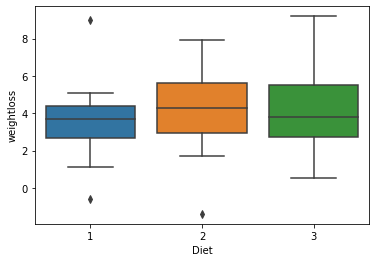

In [6]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=independent, y=dependent)

In [7]:
# Drop rows from the df_anova_one_way to remove outliers
df_less_outliers = df_anova_one_way
df_less_outliers.drop(df_less_outliers[df_less_outliers['weightloss'] < 0].index, inplace=True)
df_less_outliers.drop(df_less_outliers[(df_less_outliers['Diet'] == 1) & (df_less_outliers['weightloss'] == 9.0)].index, inplace=True)

C:\Users\Julian Dunne\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Julian Dunne\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Boxplot displaying 'Diet' & 'weightloss'
Boxplot displays data which does not include the outlier values.<br>
Now that the outliers have been removed the boxplot has been rescaled and it now shows a new outlier. Since the sample size of data is quite small and the outlier value is not significantly smaller it is acceptable to assume minimal impact on the one-way Anova study results.

<AxesSubplot:xlabel='Diet', ylabel='weightloss'>

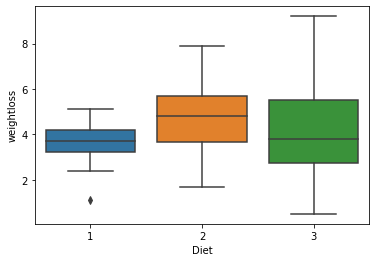

In [8]:
dependent_less_outliers = df_less_outliers['weightloss']
independent_less_outliers = df_less_outliers['Diet']
sns.boxplot(x=independent_less_outliers, y=dependent_less_outliers)

***
### Assumption 5:
The dependent variable should be normally distributed for each category of the independent variable.

In [9]:
# KDEs of the three categories.
sns.displot(x=dependent, hue=independent, kind="kde")
plt.savefig('outliers_included.jpg')
plt.close()
sns.displot(x=dependent_less_outliers, hue=independent_less_outliers, kind="kde")
plt.savefig('outliers_not_included.jpg')
plt.close()

### Distribution of Data
The image on the left includes the outlier values and the image on the right does not include the outlier values. The data for each diet visually appears to be normally distributed for both instances of the dataset<br>
There does appear to be a noticeable difference in how the data is distributed when the outlier values are removed.

![Alt](outliers_included.jpg) | ![Alt](outliers_not_included.jpg)

### Test for Nomality
Although the plot above appears to be normally distributed, normality can be confirmed using the Shapiro-Wilk test of normality.

In [10]:
# Remove the measured weight loss for each diet.
diet_1 = dependent[independent == 1]
diet_2 = dependent[independent == 2]
diet_3 = dependent[independent == 3]

In [11]:
ss.shapiro(diet_1)

ShapiroResult(statistic=0.936674952507019, pvalue=0.5166419148445129)

In [12]:
ss.shapiro(diet_2)

ShapiroResult(statistic=0.9502205848693848, pvalue=0.646774172782898)

In [13]:
ss.shapiro(diet_3) 

ShapiroResult(statistic=0.9414259791374207, pvalue=0.5167645215988159)

***

In [14]:
# Remove the measured weight loss for each diet.
diet_1_less_outliers = dependent_less_outliers[independent_less_outliers == 1]
diet_2_less_outliers = dependent_less_outliers[independent_less_outliers == 2]
diet_3_less_outliers = dependent_less_outliers[independent_less_outliers == 3]

In [15]:
ss.shapiro(diet_1_less_outliers)

ShapiroResult(statistic=0.9338464736938477, pvalue=0.5517240166664124)

In [16]:
ss.shapiro(diet_2_less_outliers)

ShapiroResult(statistic=0.9792430996894836, pvalue=0.9609889388084412)

In [17]:
ss.shapiro(diet_3_less_outliers) 

ShapiroResult(statistic=0.9414259791374207, pvalue=0.5167645215988159)

<b>Note:</b> The Shapiro-Wilk Test requires a pvalue of greater than 0.05 to imply that the data is normally distributed. The above tests all meet this criteria.

***
### Assumption 6:
Homogeneity of variances to be present. The Levene test tests the null hypothesis that all input samples are from populations with equal variances. If the data fails this assumption then a one-way Anova is not suitable for the sample data.<br>
The pvalue of 86% for data that includes outlier values implies equal variance among the sample populations. The pvalue of 16% for data that does not include outlier values is also acceptable for running a one-way Anova test.

In [18]:
# Levene test for equal variance - data does include outlier values.
ss.levene(
    dependent[independent == 1],
    dependent[independent == 2],
    dependent[independent == 3]
)

LeveneResult(statistic=0.1479500445197727, pvalue=0.8630996143496406)

In [19]:
# Levene test for equal variance - data does not include outlier values.
ss.levene(
    dependent_less_outliers[independent_less_outliers == 1],
    dependent_less_outliers[independent_less_outliers == 2],
    dependent_less_outliers[independent_less_outliers == 3]
)

LeveneResult(statistic=1.9622186224485234, pvalue=0.16007976794206263)

***
## One-way Anova Test
The pvalues below of 86% and 53% both imply that the Null Hypothesis is true. There is no difference in the mean amount of weight loss when comparing the three different diets.

In [20]:
ss.f_oneway(
    dependent[independent == 1],
    dependent[independent == 2],
    dependent[independent == 3]
)

F_onewayResult(statistic=0.14805171518545177, pvalue=0.8630127241759452)

In [21]:
ss.f_oneway(
    dependent_less_outliers[independent_less_outliers == 1],
    dependent_less_outliers[independent_less_outliers == 2],
    dependent_less_outliers[independent_less_outliers == 3]
)

F_onewayResult(statistic=0.650030626403429, pvalue=0.5300065620899272)

***
# References:

[1] Laerd Statistics webpage on One-way ANOVA in SPSS Statistics: https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php <br>
[2] Eric marsja Github repository containing Two-Way Anova in Python Tutorial: https://github.com/marsja/jupyter/blob/master/Python_ANOVA/Two_Way_ANOVA_in_Python_Tutorial.ipynb.